## Visualisering av manglende verdier – før og etter rensing

Vi benytter funksjonen handle_missing_values() til å rense datasettet vårt
og visualisere hvilke verdier som mangler. Før rensing har enkelte kolonner som
level og qualityCode store hull i datagrunnlaget, mens andre kolonner som
elementId, value, Time og Location er tilnærmet komplette.

Visualizing missing values before cleaning:


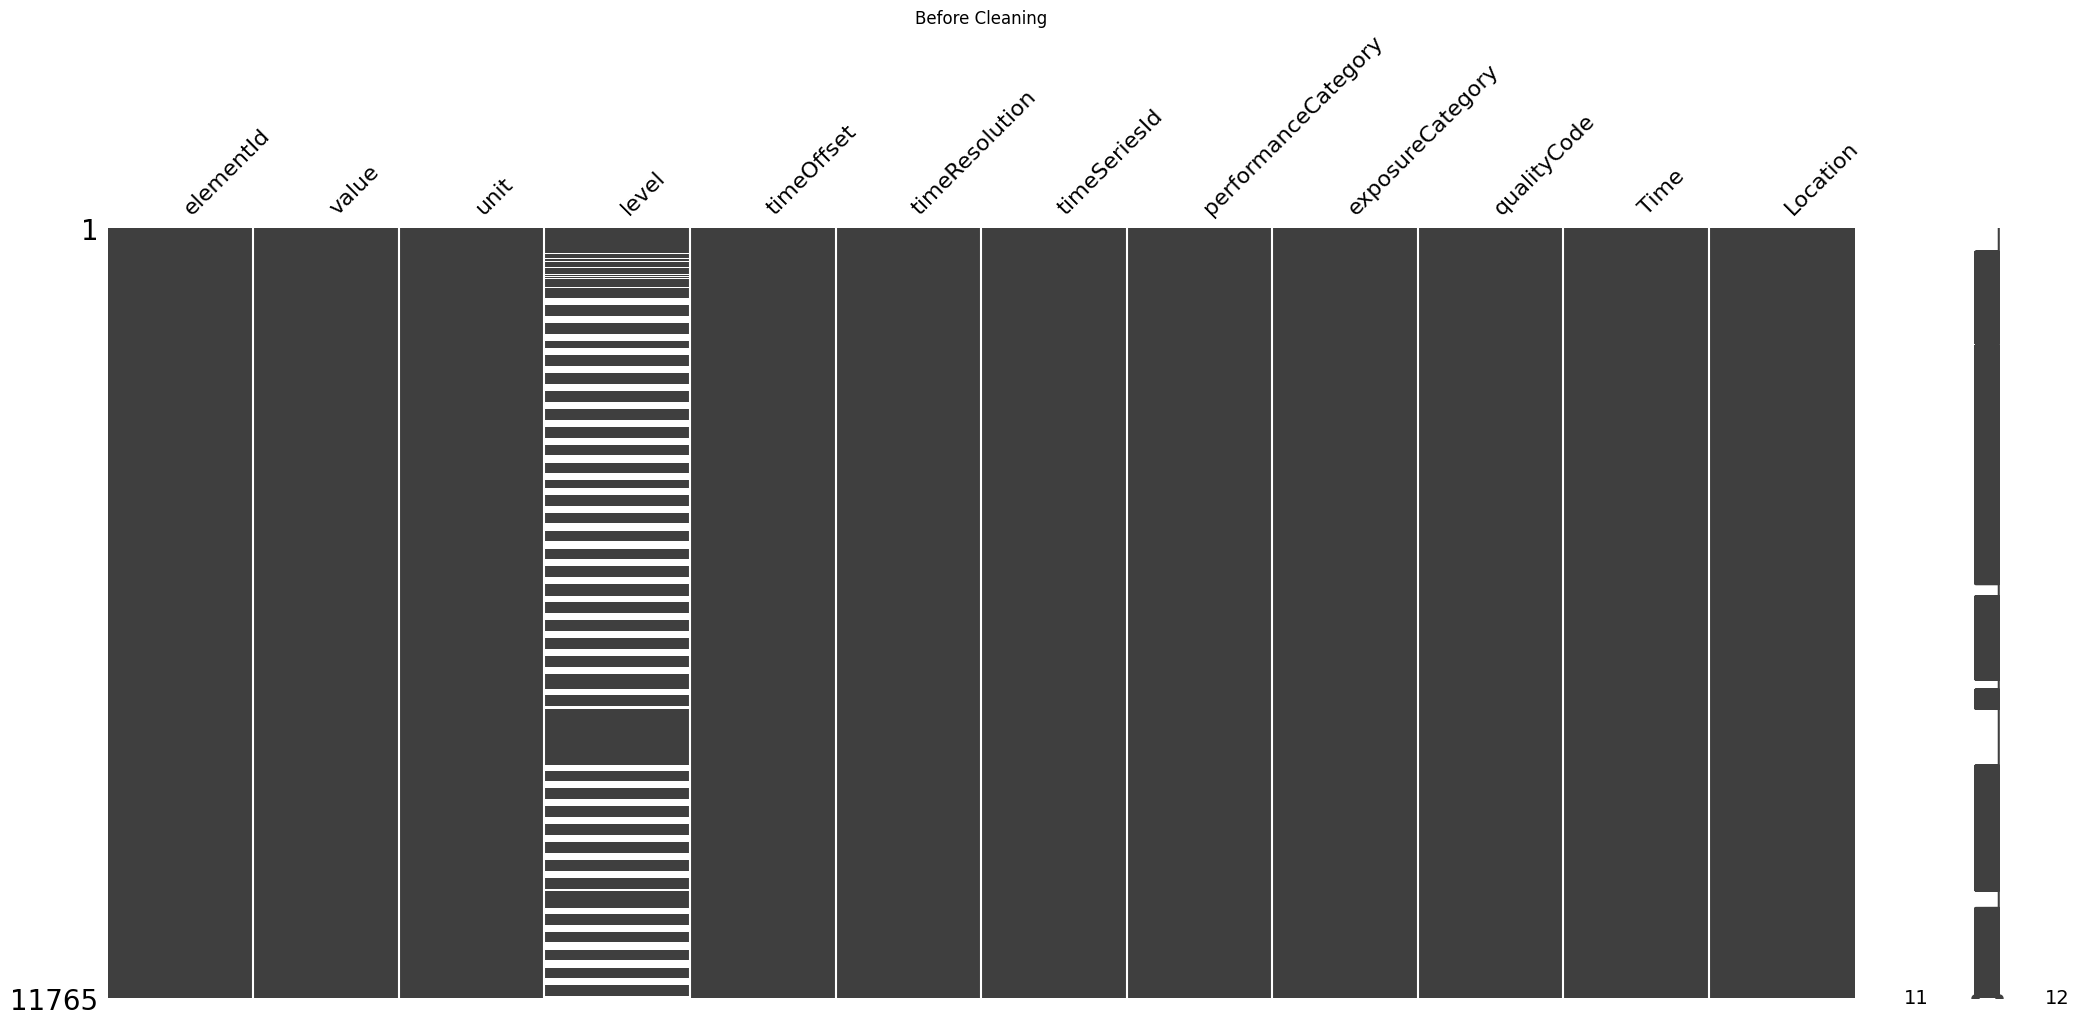

Visualizing missing values after cleaning:


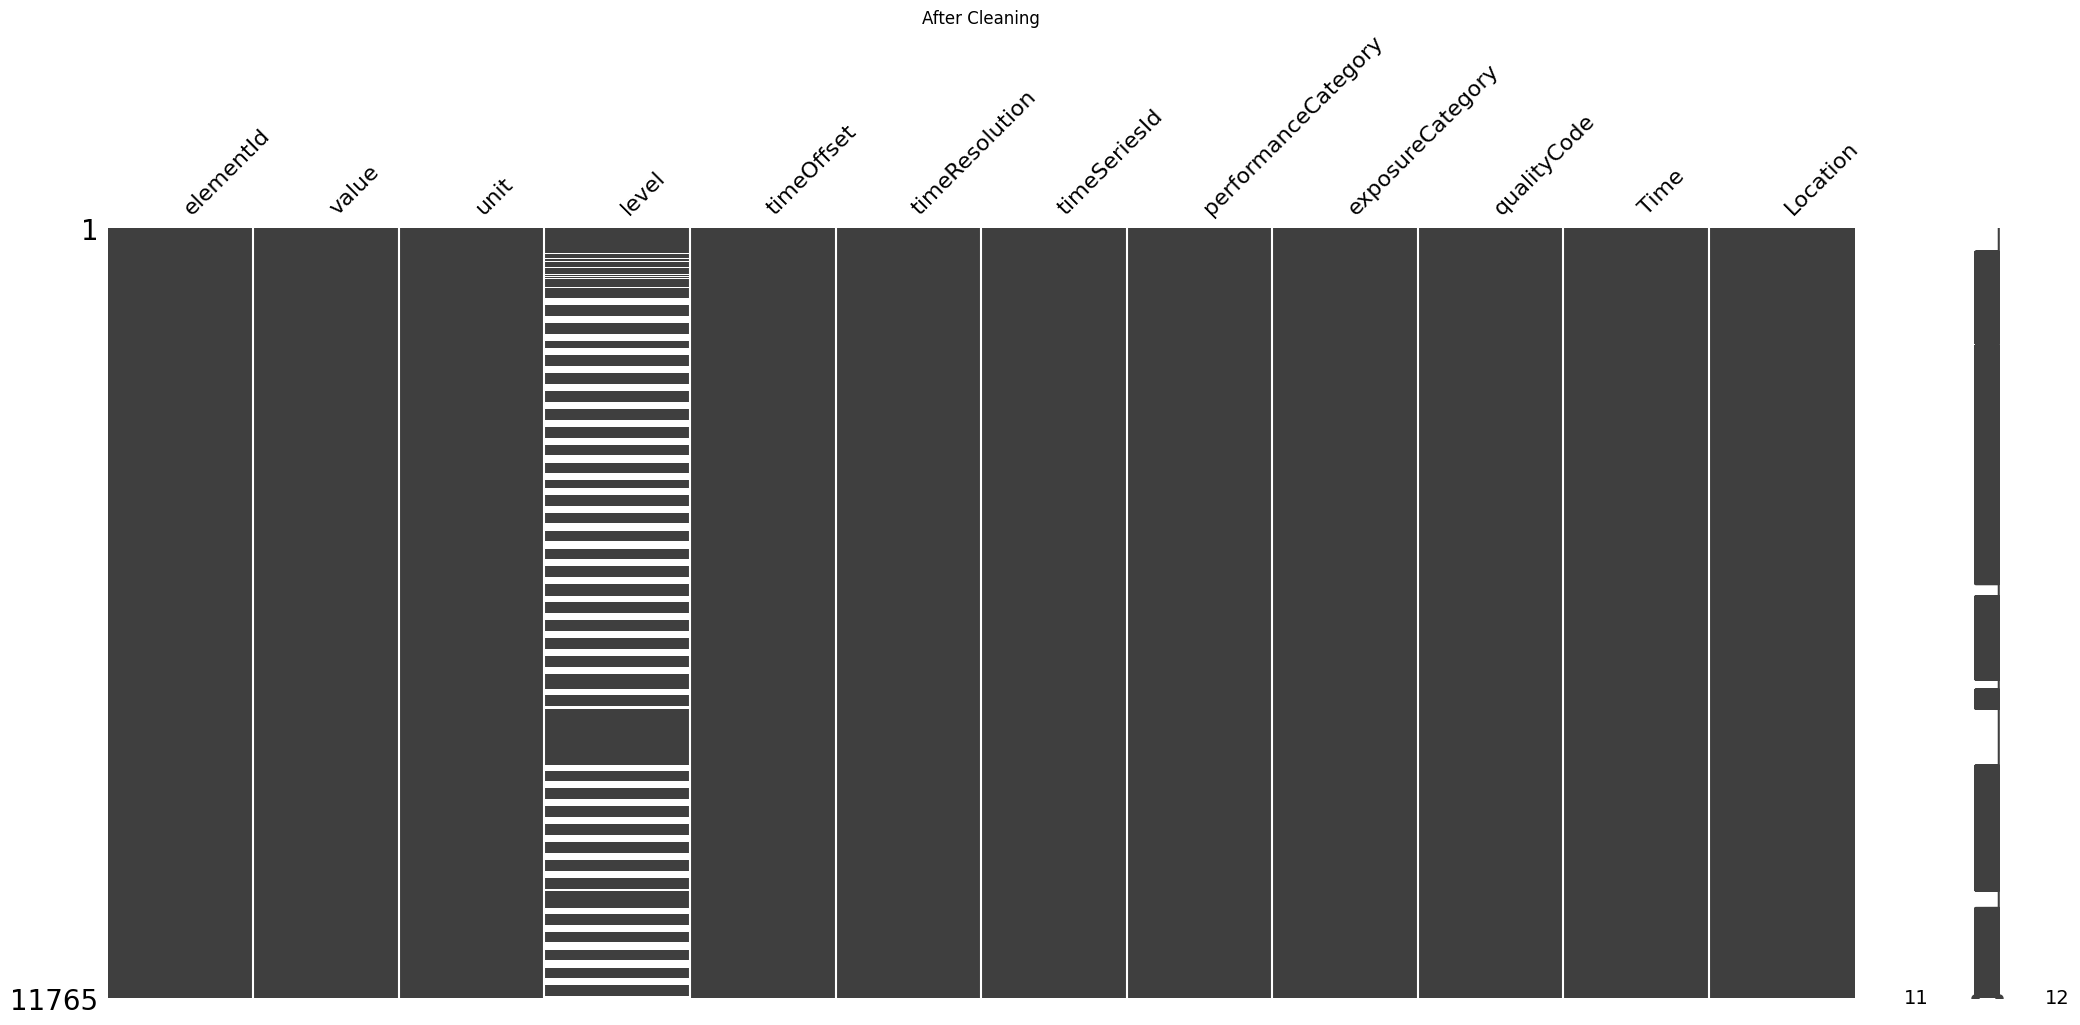

,elementId,value,unit,level,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,Time,Location
0,mean(air_temperature P1D),-2.8,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1D,0,C,2,0.0,2023-01-01T00:00:00.000Z,Steinkjer
1,mean(air_temperature P1D),1.0,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT6H,P1D,0,C,2,2.0,2023-01-01T00:00:00.000Z,Steinkjer
2,mean(wind_speed P1D),2.3,m/s,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1D,0,C,2,0.0,2023-01-01T00:00:00.000Z,Steinkjer
3,mean(relative_humidity P1D),85.0,percent,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1D,0,C,2,2.0,2023-01-01T00:00:00.000Z,Steinkjer
4,mean(air_temperature P1D),-10.3,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1D,0,C,2,0.0,2023-01-02T00:00:00.000Z,Steinkjer


In [4]:
"""
Data inspection and preprocessing script.

This script loads raw weather data from file, applies cleaning and 
missing value handling, and optionally previews the cleaned dataset.
"""

# 1. Import required modules and extend Python path to access src/
import os
import sys
sys.path.append(os.path.abspath("../src"))

import pandas as pd
from process_data import handle_missing_values

# 2. Load raw exported dataset (from main.py)
df_raw = pd.read_csv("../data/weekly_weather_data.csv")

# 3. Clean data and visualize missing values (uses missingno)
df_clean = handle_missing_values(df_raw, visualize=True)

# 4. Preview the first rows of the cleaned dataset (optional)
df_clean.head()

**Før rensing**     
Den første figuren viser at kolonner som unit, level, exposureCategory
og qualityCode har mange manglende verdier (hvite felt). Andre kolonner,
som elementId, value, Time og Location, er nesten uten mangler
(svarte felt), og utgjør kjernen i videre analyser.

Flere av kolonnene inneholder metadata fra Frost-APIet (f.eks. performanceCategory,
timeOffset og timeSeriesId), og disse har lite eller ingen verdi for vår videre analyse.

**Etter rensing**       
I den andre figuren har vi brukt handle_missing_values() til å fjerne rader der Time
eller Location manglet, og fylt inn manglende numeriske verdier med medianen.
Vi har valgt å beholde alle kolonner for å kunne dokumentere datakvaliteten,
selv om vi i analysene kun bruker de mest relevante kolonnene.

**Tolkning**  
Visualiseringene gir verdifull innsikt i datastrukturen og kvaliteten. Selv om flere
kolonner har store andeler manglende verdier, påvirker dette i liten grad analysen
fordi:
- De mest sentrale variablene (elementId, value, Time, Location) er godt dekket
- Metadata-felter med mye manglende data kan ignoreres
- Vi kan dermed trygt bruke et utvalg kolonner i videre analyse og modellering

Ved å bruke missingno får vi et godt visuelt grunnlag for hvilke kolonner
som bør beholdes, renses eller fjernes.